<a href="https://colab.research.google.com/github/LAGRA01251467/Ciencia-de-Datos-A01251467/blob/main/Actividad4EDA_A01251467.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: LUIS ALBERTO GTUIÉRREZ RIVERA
*   MATRÍCULA: A01251467

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [ ]:
df.info()

ncolumnas = df.select_dtypes(include=[np.number]).shape[1]
qcolumnas = df.select_dtypes(include=['object']).shape[1]
print(f"¿Cuántas columnas son numéricas?: {ncolumnas}")
print(f"¿Cuántas columnas son cualitativas?: {qcolumnas}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
¿Cuántas columnas son numéricas

 2. Determina el porcentaje de valores faltantes por columna.

In [42]:
pctj_faltante = df.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna:")
pctj_faltante

Porcentaje de valores faltantes por columna:


,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [41]:
desc_stats = df.describe()
print("Estadísticas descriptivas:")
print(desc_stats)

# Media y mediana
mean_age = df['person_age'].mean()
median_age = df['person_age'].median()
mean_int_rate = df['loan_int_rate'].mean()
median_int_rate = df['loan_int_rate'].median()

print(f"Media de person_age: {mean_age}, Mediana: {median_age}")
print(f"Media de loan_int_rate: {mean_int_rate}, Mediana: {median_int_rate}")

# Asimetría y curtosis
skewness = df[['person_age', 'loan_int_rate']].skew()
kurtosis = df[['person_age', 'loan_int_rate']].kurtosis()
print(f"Asimetría:\n{skewness}\nCurtosis:\n{kurtosis}")

Estadísticas descriptivas:
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000    

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

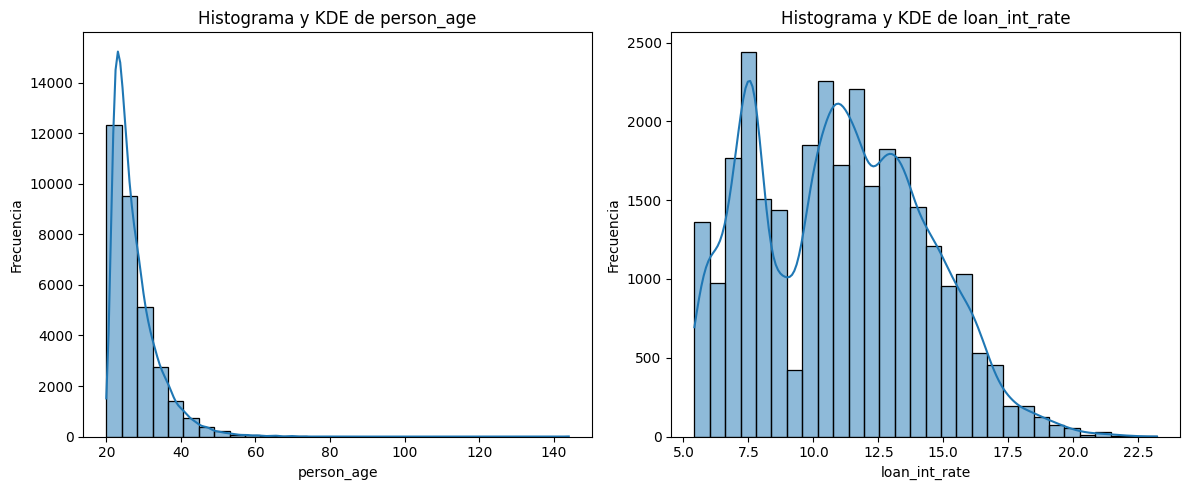

In [ ]:
variables = ['person_age', 'loan_int_rate']

plt.figure(figsize=(12, 5))

for i, col in enumerate(variables):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histograma y KDE de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


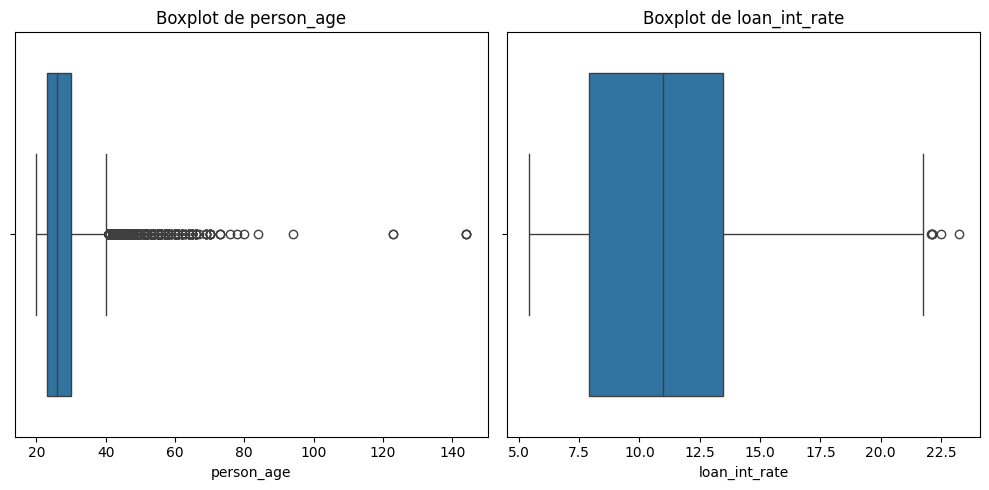

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['person_age'])
plt.title('Boxplot de person_age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['loan_int_rate'])
plt.title('Boxplot de loan_int_rate')

plt.tight_layout()
plt.show()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [ ]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [ ]:
text_stats = df.describe(include='object')
print("Estadísticas descriptivas de variables de texto:\n", text_stats)

text_summary = []

for col in df.select_dtypes(include=['object']).columns:
    mode_value = df[col].mode()[0]

    cardinality = df[col].nunique()

    value_counts = df[col].value_counts().to_dict()
    text_summary.append({
        'Variable': col,
        'Moda': mode_value,
        'Cardinalidad': cardinality,
        'Recuentos únicos': value_counts
    })

text_summary_df = pd.DataFrame(text_summary)

print("\nResumen de estadísticas de variables de texto:")
text_summary_df


Estadísticas descriptivas de variables de texto:
        person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836

Resumen de estadísticas de variables de texto:


,Variable,Moda,Cardinalidad,Recuentos únicos
0,person_home_ownership,RENT,4,"{'RENT': 16446, 'MORTGAGE': 13444, 'OWN': 2584..."
1,loan_intent,EDUCATION,6,"{'EDUCATION': 6453, 'MEDICAL': 6071, 'VENTURE'..."
2,loan_grade,A,7,"{'A': 10777, 'B': 10451, 'C': 6458, 'D': 3626,..."
3,cb_person_default_on_file,N,2,"{'N': 26836, 'Y': 5745}"


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

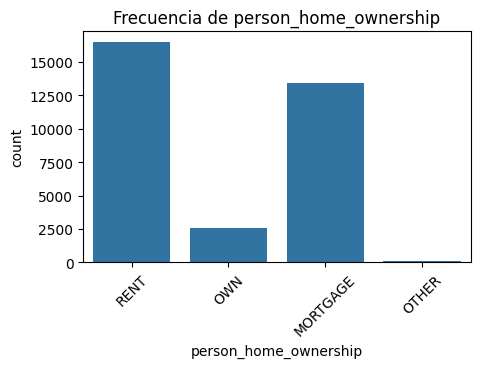

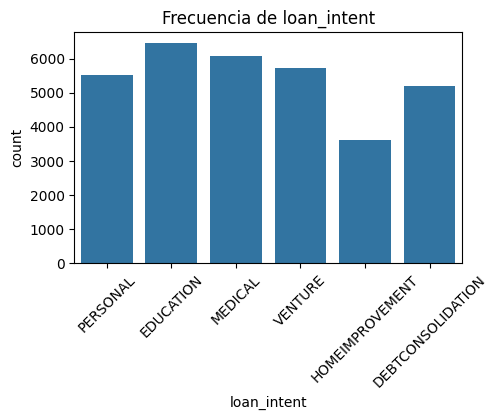

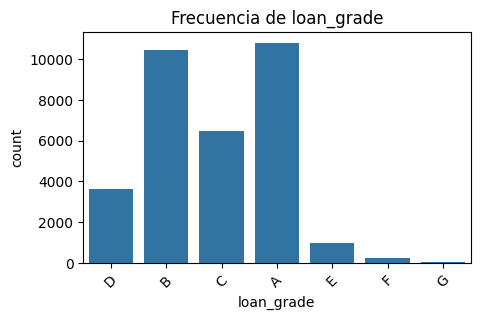

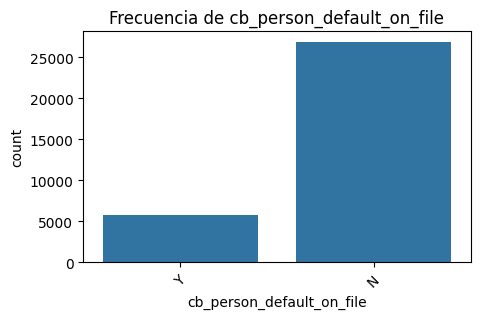

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=df)
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=45)
    plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


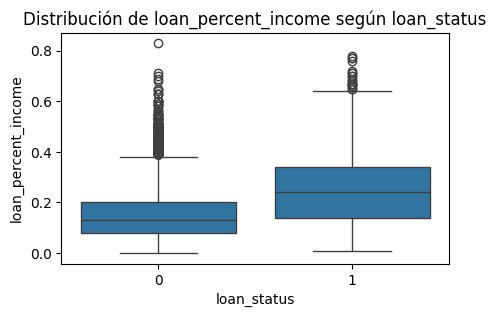

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title('Distribución de loan_percent_income según loan_status')
plt.show()

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


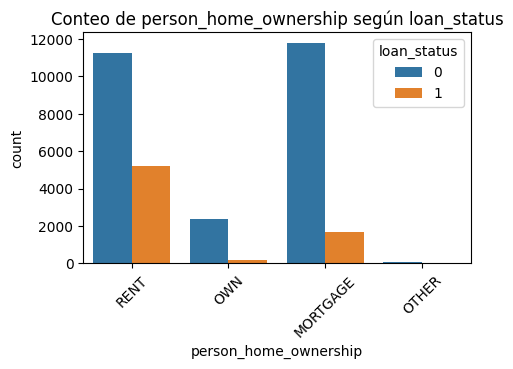

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


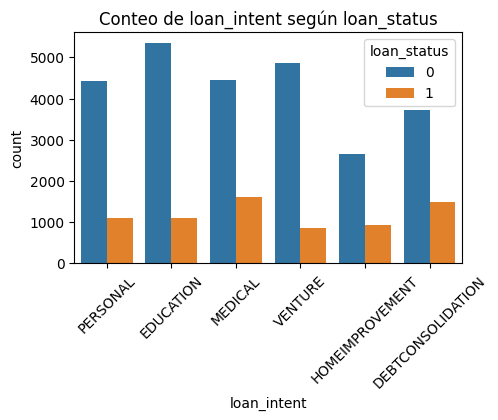

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


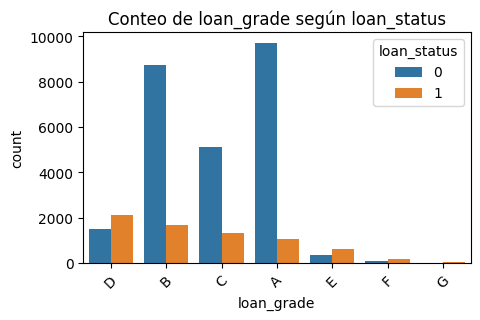

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


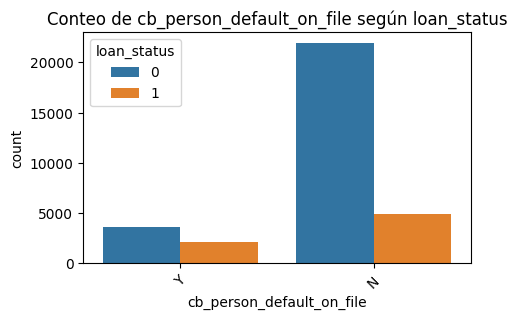

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.title(f'Conteo de {col} según loan_status')
    plt.xticks(rotation=45)
    plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

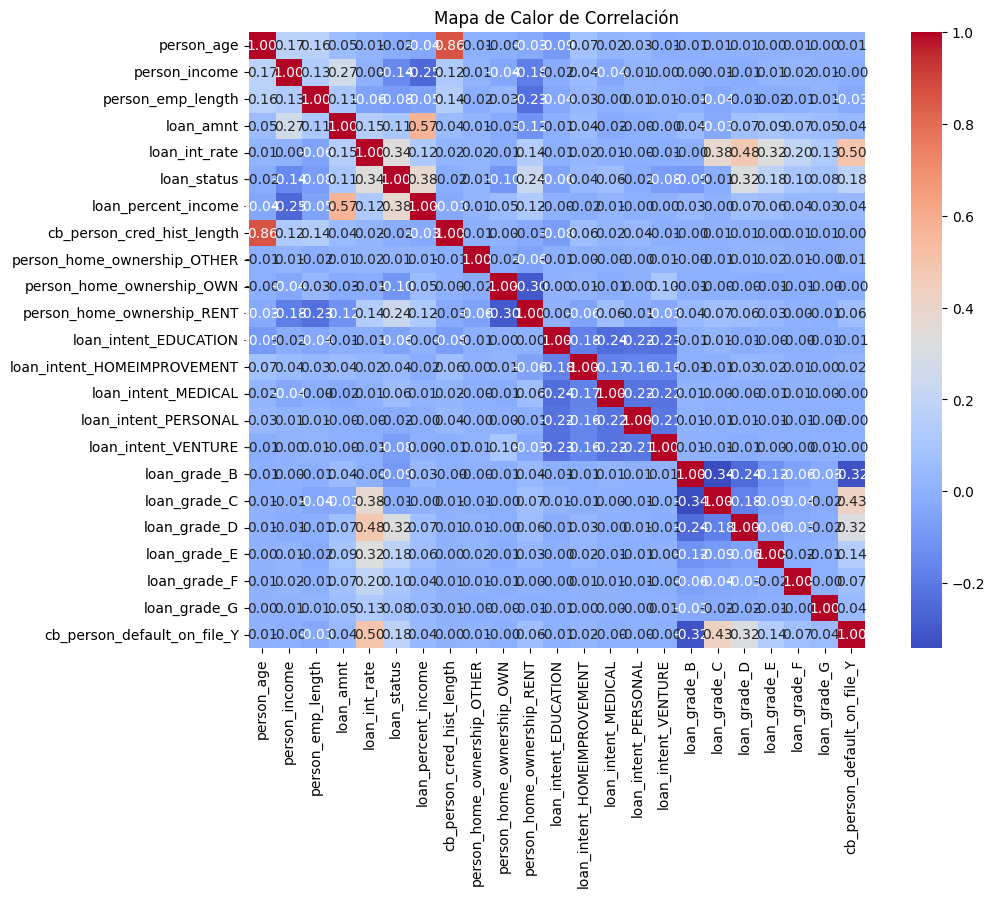

Correlación de las variables con loan_status:
loan_percent_income            0.379366
loan_int_rate                  0.335133
loan_grade_D                   0.318998
person_home_ownership_RENT     0.238430
loan_grade_E                   0.180122
cb_person_default_on_file_Y    0.179141
loan_amnt                      0.105376
loan_grade_F                   0.101841
loan_grade_G                   0.082306
loan_intent_MEDICAL            0.056595
loan_intent_HOMEIMPROVEMENT    0.036607
person_home_ownership_OTHER    0.012543
loan_grade_C                  -0.013031
cb_person_cred_hist_length    -0.015529
loan_intent_PERSONAL          -0.021094
person_age                    -0.021629
loan_intent_EDUCATION         -0.055348
loan_intent_VENTURE           -0.078274
person_emp_length             -0.082489
loan_grade_B                  -0.092190
person_home_ownership_OWN     -0.101960
person_income                 -0.144449
Name: loan_status, dtype: float64

La variable con mayor correlación con '

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)

corr = df_dummies.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Mapa de Calor de Correlación')
plt.show()

correlations = corr['loan_status'].sort_values(ascending=False)
correlations = correlations[correlations.index != 'loan_status']

highest_corr_variable = correlations.idxmax()
highest_corr_value = correlations.max()

print("Correlación de las variables con loan_status:")
print(correlations)
print(f"\nLa variable con mayor correlación con 'loan_status' es '{highest_corr_variable}' con una correlación de {highest_corr_value:.2f}.")
